## LSTM : IMDB 예제

In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
max_features=10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU

In [3]:
model = Sequential()
model.add(Embedding(max_features+1, 32, input_length=maxlen))
model.add(GRU(32))
#model.add(LSTM(32, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320032    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,305
Trainable params: 326,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 287s 14ms/step - loss: 0.4873 - acc: 0.7606 - val_loss: 0.3801 - val_acc: 0.8360
Epoch 2/10
15552/20000 [======================>.......] - ETA: 1:02 - loss: 0.2927 - acc: 0.8828

KeyboardInterrupt: 

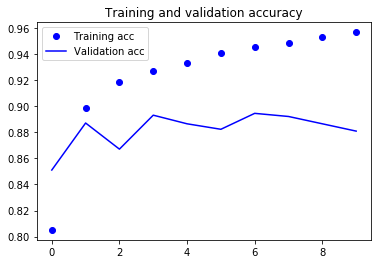

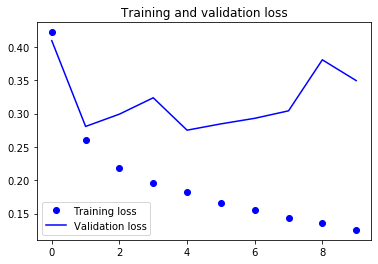

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()